# Summative Assessment - Data Analytics and Visualization

## Michael NANA KAMENI

This assessment will cover the following:
- Importing the data and dealing with missing values
- Exploring the data and producing some simple visualizations
- Sampling and comparing samples
- Looking for correlation
- Using regression to predict power consumption

It's split into tasks, each in its own section. Write your code and answers in the spaces provided. Feel free to add cells and import any libraries you'll require.

## The data

The data we'll be using in this assesssment was downloaded from data.world (https://data.world/databeats/household-power-consumption), a subset of a larger dataset available from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption#).

It may look familiar to some of you!

Here's the description of the data from the site:

<b>Data Set Information</b>

This household electricity consumption dataset contains 260,640 measurements gathered between January 2007 and June 2007 (6 months). It is a subset of a larger, original archive that contains 2,075,259 measurements gathered between December 2006 and November 2010 (47 months).

<b>Attribute Information</b>

date: Date in format dd/mm/yyyy
time: time in format hh:mm:ss
global_active_power: household global minute-averaged active power (in kilowatt)
global_reactive_power: household global minute-averaged reactive power (in kilowatt)
voltage: minute-averaged voltage (in volt)
global_intensity: household global minute-averaged current intensity (in ampere)
sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## Assessment Flow

## Task 1 - Getting the data!

*The* data has not been downloaded for you. Save the file and add the correct file path for your file.

In [1]:
file_path = 'household_power_consumption-household_power_consumption.csv'

It is comma separated, but has a major issue you'll have to deal with before you can begin working with it: missing values are marked with a '?'. You'll need to remove all rows with missing values and make sure the columns are the right type before we move on. This is a classic example of a problem whose solution isn't worth memorizing, so if you're struggling take a look around on stack overflow or elsewhere for others who've solved the same problem!

In [2]:
# Import the libraries you'll be using and load the data into a pandas dataframe here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

Now, we can start looking at this data. Assuming you've called your dataframe 'df', run df.head() and df.describe() to see what we're working with. Remember, at this stage you shouldn't have missing data.

In [3]:
# Look at the data you've loaded
df = pd.read_csv(file_path, sep = ';', low_memory=False)
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,01/01/2007,00:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,01/01/2007,00:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,01/01/2007,00:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,01/01/2007,00:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,01/01/2007,00:04:00,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...
260635,30/06/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,30/06/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,30/06/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,30/06/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0


In [4]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 9 columns):
Date                     260640 non-null object
Time                     260640 non-null object
Global_active_power      260640 non-null object
Global_reactive_power    260640 non-null object
Voltage                  260640 non-null object
Global_intensity         260640 non-null object
Sub_metering_1           260640 non-null object
Sub_metering_2           260640 non-null object
Sub_metering_3           256869 non-null float64
dtypes: float64(1), object(8)
memory usage: 17.9+ MB


In [5]:
# Converting data columns from object to float
df["Global_active_power"]=pd.to_numeric(df["Global_active_power"],errors='coerce')
df["Global_reactive_power"]=pd.to_numeric(df["Global_reactive_power"],errors='coerce')
df["Voltage"]=pd.to_numeric(df["Voltage"],errors='coerce')
df["Global_intensity"]=pd.to_numeric(df["Global_intensity"],errors='coerce')
df["Sub_metering_1"]=pd.to_numeric(df["Sub_metering_1"],errors='coerce')
df["Sub_metering_2"]=pd.to_numeric(df["Sub_metering_2"],errors='coerce')
df["Sub_metering_3"]=pd.to_numeric(df["Sub_metering_3"],errors='coerce')

In [6]:
# Let us count the number of null values in each column:
df.isnull().sum()

Date                        0
Time                        0
Global_active_power      3771
Global_reactive_power    3771
Voltage                  3771
Global_intensity         3771
Sub_metering_1           3771
Sub_metering_2           3771
Sub_metering_3           3771
dtype: int64

In [7]:
# Now let us deal with columns data that have the '?':
df.replace('?', np.NaN)  # replace the '?' by NaN in their respective cells
df.shape                 # Check number of rows and number of columns

(260640, 9)

In [8]:
df = df.dropna() # Let us drop rows that have cells with null values
df.shape        # Check number of rows and number of columns

(256869, 9)

In [9]:
df = df.drop_duplicates() # Let us drop rows that have cells with null values
df.shape                  # Check number of rows and number of columns

(256869, 9)

In [10]:
# Let us run 
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,01/01/2007,00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,01/01/2007,00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,01/01/2007,00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,01/01/2007,00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,01/01/2007,00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0


In [11]:
# Run df.describe() 
old_sum_df = df.describe() 
old_sum_df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000
mean,1.164937,0.123729,239.208981,4.974755,1.332481,1.670610,5.831825
std,1.181832,0.111872,3.592793,4.999493,6.704970,6.631361,8.186709
min,0.082000,0.000000,223.490000,0.400000,0.000000,0.000000,0.000000
25%,0.296000,0.000000,236.650000,1.400000,0.000000,0.000000,0.000000
50%,0.564000,0.104000,239.610000,2.600000,0.000000,0.000000,0.000000
75%,1.606000,0.194000,241.810000,6.800000,0.000000,1.000000,17.000000
max,10.670000,1.148000,250.890000,46.400000,78.000000,78.000000,20.000000


Look at the count field - lots of rows! Try running something like df.plot() - it takes a while. Imagine a dataset with 25 million rows. If we're going to be exploring and playing around, we might not want to wait for things to complete. So, sampling! Your next task will be to generate a smaller dataset for data exploration

## Task 2: Subsampling

Create two new dataframes, one with the first 1000 rows of df and another with 1000 rows starting from 75,000. 

In [12]:
# specific sampling the data using iloc
df_1000 = df.iloc[0:1000]         #Dataframe containing the first 1000 rows of df
df_75000 = df.iloc[75000:75999]   #Dataframe containing the first 1000 rows of df starting from 75,000.

Do you think the first 1000 rows will give a good picture of the whole dataset? Find the mean and std dev for both of your small datasets. Do they match? Do they reflect the statistics for the dataset as a whole? Write your answers to these questions in a cell below the code you use to create and investigate these new dataframes.

I do not think the small datasets of 1000 rows could give a picture of the whole dataset because there are not representative of the whole dataset in view of their constitution. And any analysis resulting from those datasets might be biased. 

In [13]:
# Find the mean and std dev for both of your small datasets. 
sum_1000=df_1000.describe() # Define summary statistics
sum_1000.iloc[1:3]          # Retrive of the summary statistic the mean and the standard deviation 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
mean,2.384750,0.101824,240.421420,9.874600,0.0,0.246000,3.161000
std,0.573988,0.091648,2.011932,2.345493,0.0,0.545694,6.738582


In [14]:
# Find the mean and std dev for both of your big datasets. 
sum_75000=df_75000.describe() # Define summary statistics
sum_75000.iloc[1:3]           # Retrive of the summary statistic the mean and the standard deviation 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
mean,1.816643,0.086258,239.819119,7.571371,0.0,0.249249,6.932933
std,1.173109,0.075006,2.097267,4.930176,0.0,0.552764,8.536290


The result of the mean and the standard deviation for the both small datasets does not match. And it is confirming the hypothesis I started earlier saying that those datasets of 1000 rows were not representative of the whole dataset regarding their constitution. And above all, they do not event reflect the summary statistics of the whole dataset because while comparing the result of each of them, they are different between them and also with the whole dataset, they look totaly different. One can easily remark while comparing the result mean and the standard deviation of <b>Sub_metering_1</b> the small datasets which is equal to <b>zeroes (0)</b> with the whole one which are respectively equal to <b>1.33248</b> for the <b>mean</b> and to <b>6.70497</b> for the <b> standard deviation</b>.

Create one new dataframe with the first 10,000 rows of data. Use random sampling to create a dataframe with 10,000 rows taken randomly from within the data and name it df_small. Is this a better representation of the dataset as a whole? If so, we can move on. If not, add more data or make other changes you feel are necessary.

In [15]:
# Let us create a new dataframe with the first 10000 rows of data.
df_small = df[0:10000]
df_small

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,01/01/2007,00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,01/01/2007,00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,01/01/2007,00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,01/01/2007,00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,01/01/2007,00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9995,07/01/2007,22:35:00,1.728,0.000,241.81,7.2,0.0,0.0,18.0
9996,07/01/2007,22:36:00,1.720,0.000,242.65,7.0,0.0,0.0,18.0
9997,07/01/2007,22:37:00,1.738,0.000,242.62,7.2,0.0,0.0,18.0
9998,07/01/2007,22:38:00,1.686,0.000,242.38,7.0,0.0,0.0,18.0


In [45]:
# Let us create a dataframe of 10,000 rows with random sampling. 
df_small1 =df.sample(n=10000, axis = 0)
df_small1

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
112278,19/03/2007,23:18:00,1.644,0.000,244.92,6.6,0.0,0.0,0.0
229656,09/06/2007,11:36:00,0.574,0.328,241.06,2.6,0.0,1.0,0.0
131603,02/04/2007,09:23:00,1.586,0.178,235.94,6.6,0.0,0.0,18.0
231128,10/06/2007,12:08:00,1.440,0.000,239.22,6.0,0.0,2.0,17.0
193593,15/05/2007,10:33:00,1.384,0.072,233.93,5.8,0.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...
158220,20/04/2007,21:00:00,2.234,0.322,238.93,9.4,1.0,1.0,18.0
218068,01/06/2007,10:28:00,1.296,0.060,231.83,5.6,0.0,1.0,16.0
95802,08/03/2007,12:42:00,0.386,0.178,241.24,1.8,0.0,2.0,0.0
156743,19/04/2007,20:23:00,1.868,0.326,238.55,7.8,0.0,6.0,17.0


The new dataframe with the first 10,000 rows as the first two dataframes we have created cannot be representative of the the whole dataset. Whereas the second new dataframe of 10,000 rows generated randomly might be representative of the whole dataset. To confirm it let us check the summary statistics of both of them.

In [46]:
# Find the mean and std dev for the first 10000 rows of your small datasets.
sum_small=df_small.describe() # Define summary statistics
sum_small.iloc[1:3]           # Retrive of the summary statistic the mean and the standard deviation 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
mean,1.544369,0.146020,240.599600,6.546850,0.963850,1.826800,6.737000
std,1.305446,0.119327,3.378591,5.514786,5.747904,7.551149,8.492193


In [47]:
# Find the mean and std dev for the first 10000 rows of your small datasets.
sum_small1=df_small1.describe() # Define summary statistics
sum_small1.iloc[1:3]           # Retrive of the summary statistic the mean and the standard deviation 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
mean,1.158731,0.124323,239.183318,4.947500,1.285400,1.708800,5.823900
std,1.167918,0.113101,3.610716,4.944022,6.513063,6.749501,8.188663


In [49]:
# Let us recall the mean and standard deviation of the ancien dataframe
old_sum_df.iloc[1:3]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
mean,1.164937,0.123729,239.208981,4.974755,1.332481,1.670610,5.831825
std,1.181832,0.111872,3.592793,4.999493,6.704970,6.631361,8.186709


Since the result is still does not match, let us reajust the sample dataframe. 

In [50]:
# Let us check if there is duplicate element in the random sampling
sum_small1.duplicated().sum()

0

In [51]:
# Let us create a new dataframe with the first 15,000 rows of data.
df_small = df.iloc[0:20000] 

In [52]:
# # Let us create a dataframe of 20,000 rows with random sampling.
df_small1 =df.sample(n=20000, axis = 0)

In [53]:
# Find the mean and std dev for the first 20,000 rows of your small datasets.
sum_small=df_small.describe() # Define summary statistics
sum_small.iloc[1:3]           # Retrive of the summary statistic the mean and the standard deviation 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
mean,1.544369,0.146020,240.599600,6.546850,0.963850,1.826800,6.737000
std,1.305446,0.119327,3.378591,5.514786,5.747904,7.551149,8.492193


In [54]:
# Find the mean and std dev for the first 20,000 rows of your small datasets.
sum_small1=df_small1.describe() # Define summary statistics
sum_small1.iloc[1:3]           # Retrive of the summary statistic the mean and the standard deviation 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
mean,1.167450,0.125406,239.200452,4.985520,1.375200,1.685250,5.856500
std,1.185901,0.112317,3.583956,5.014038,6.776667,6.666086,8.199199


In [55]:
# Let us recall the mean and standard deviation of the ancien dataframe
old_sum_df.iloc[1:3]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
mean,1.164937,0.123729,239.208981,4.974755,1.332481,1.670610,5.831825
std,1.181832,0.111872,3.592793,4.999493,6.704970,6.631361,8.186709


The result of the random sample of 20,000 rows dataframe could be exploited this way because it matching with the result of the whole dataset. 

## Task 3: Correlation and Plotting

Explore the correlation of various features in the graph. Plot some scatterplots showing the features with the highest correlation coeficient, and some for those with the lowest correlation coeficient. 

- Name two pairs of highly correlated variables. 
- Produce at least three scatter plots.

### Answer:

Let us plot scatterplots to show the features between variable and then we are to analyse to say what have the highest correlation and which have the lowest correlation.

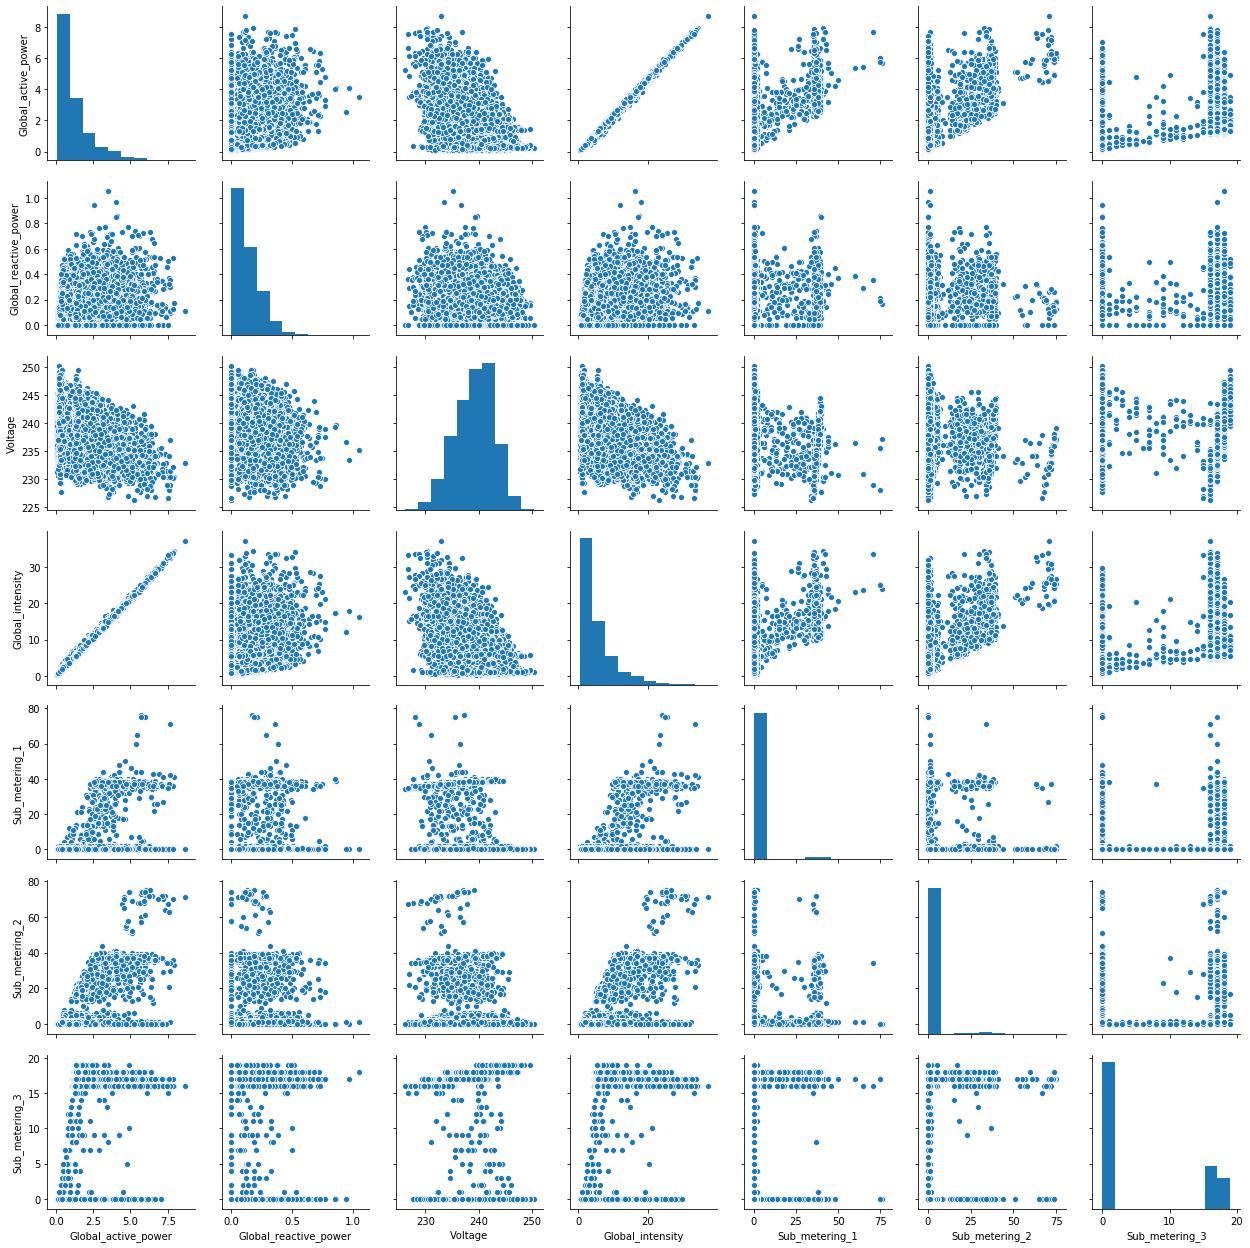

In [56]:
# We are going plot a pairplot to see the correlation between variables:
sns.pairplot(df_small1)

At the first, we can say the variables highly correlated are <b>Global_active_power</b> and <b>Global_intensity</b>. Concerning those two variable, when <b>Global_active_power</b> increases, the <b>Global_intensity</b> increases as well and vice versa. As for the lowest correlated variable let us, use matrix correlation to check of out, which variables are the lowest correlated because it is difficult to say it at first sight. 

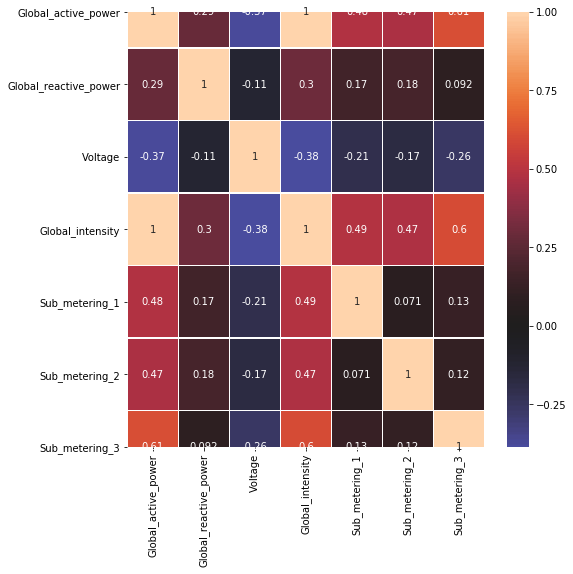

In [61]:
# 
fig, ax = plt.subplots(figsize=(8,8))
ax1 = ax
matrix_corr = df_small1.corr()
sns.heatmap(matrix_corr, center = 0, annot=True, linewidths=.3, ax =ax1)

The lowest correlated variables are those who are linked with the absolute of correlated coefficient value closiest to zeroe(0). In regard of that we could easily conclute, they are <b>Sub_metering_1</b> and <b>Sub_metering_2</b>.

## Task 4: Simple Linear Regression

Find the parameters of a simple linear model with Global_intensity as the explanatory variable and Global_active_power as the dependent variable

- Print out the model parameters and score

### Answer:

In [19]:
# Build a simple model and find parameters, as well as the R-Squared Value

## Task 5: Regression, but harder this time

You didn't think it was going to be that easy? Intensity and power are different measures of essentially the same thing. We want to predict power from the other readings - a much harder task.

Tasks: 
- Predict the power based on as many of the other factors as you think necessary. As before, print out model parameters and the score, both when using the model on your sample and when running it (i.e. score()) over the whole dataset.

### Answer:

## Task 6 - Logistic Regression

Use logistic regression to predict occasions when Sub_metering_1 is greater than Sub_metering_2 - in other words, when is the kitchen more in use then the laundry room? 
Tasks: 
- Add a column with a 1 when kitchen power is higher than laundry room (sub_metering_1>2) and a 0 when not. 
- Build a logistic regression model with this as the dependant variable. Use any variables as inputs.
- How did your model score? Briefly comment with your thoughts. Do you think this is something one could feasibly predict from the available data?

## Task 7 - Visualizations and conclusions

Well done! You're almost through. Now for some final easy points, pick three of the following questions and create a visualization and some text to answer the question:
- What time of day is the kitchen used?
- Does the weekly power consumption remain constant?
- Which sub-metering zone used the most power?
- How did power use in the different zones change over time?
- How did the two small subsamples you created in the beginning (1000 rows each) differ?